## Baryon asymmetry

https://arxiv.org/pdf/1908.04818.pdf

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [3]:
#Read old file
xd = pd.read_csv('nbs-scan.csv')
del xd['Unnamed: 0']

xd.shape

(521421, 10)

cleaning NAN and negative values in $\Delta n_B$

In [4]:
xd = xd[np.abs(xd.Deltan_B) >0.]

xd = xd.reset_index()
del[xd['index']]

In [5]:
xd.shape

(521421, 10)

In [6]:
#Read old file
yd = pd.read_csv('../DarkBariogenesis/good-points.csv')
#yd = pd.read_csv('../DarkBariogenesis/good-points-under-panda.csv')
del yd['Unnamed: 0']

yd.shape

(1350, 105)

In [7]:
x_new=pd.read_csv('x_YA2.csv')

In [8]:
print(xd.shape,x_new.shape)

(521421, 10) (521421, 2)


the rescaling $\lambda_c$ coupling

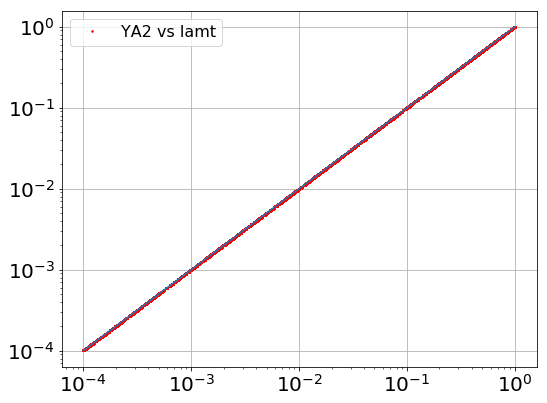

In [12]:
plt.figure(figsize=(8,6))

b = np.linspace(1e-4,1,10)

plt.loglog(x_new.YA2, xd.lamt*np.cos(xd.tht), color='red', marker='.',ms=3,linestyle='',label='YA2 vs lamt')
plt.plot(b,b)

plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

$$ s \approx 2\pi^2 g^{*}T_c^3/45  $$

$$ g^{*}\approx g_B +(7/8)g_F \approx \mathcal{O}(100) $$

$$ \eta_B = \dfrac{\Delta n_B}{s} \approx 0.9 \times 10^{-10}$$

experimental value

In [13]:
eta_exp = 0.9*1e-10
eta_min = (5.8/7.04)*1e-10
eta_max = (6.5/7.04)*1e-10

print(eta_min,eta_exp,eta_max, (eta_min+eta_max)/2.)
print(eta_min,eta_max)

8.238636363636364e-11 9e-11 9.232954545454546e-11 8.735795454545455e-11
8.238636363636364e-11 9.232954545454546e-11


### entropy $s$ value

In [14]:
Tc = 246.
gx = 100.
entropy = (2.*np.pi**2*gx*(Tc**3)/45.)
print(entropy)

653014084.7303805


### $\eta_B=\dfrac{\Delta n_B}{s}$ value

In [15]:
xd['etaB'] = np.abs(xd.Deltan_B)/entropy

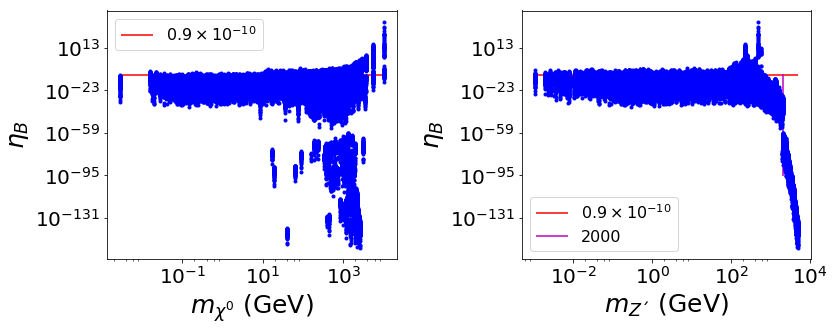

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(xd.mot,xd.etaB,'b.',label=r'')

plt.hlines(0.9e-10,xd.mot.min(),xd.mot.max(),'r',label=r'$0.9 \times 10^{-10}$')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

#plt.ylim(1e-39,1e-6)

plt.subplot(122)
plt.loglog(xd.MZp,xd.etaB,'b.',label=r'')

plt.hlines(0.9e-10,xd.MZp.min(),xd.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')

plt.vlines(2000.,1e-96,1e-9,'m',label=r'2000')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

#plt.ylim(1e-39,1e-6)

plt.tight_layout()
plt.show()

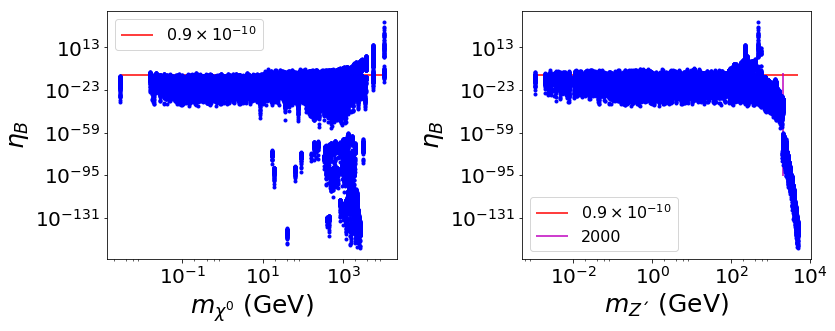

good points

In [17]:
gp=xd[np.logical_and(xd.etaB > 1e-11 , xd.etaB < 1e-9)]

gp = gp.reset_index()
del[gp['index']]

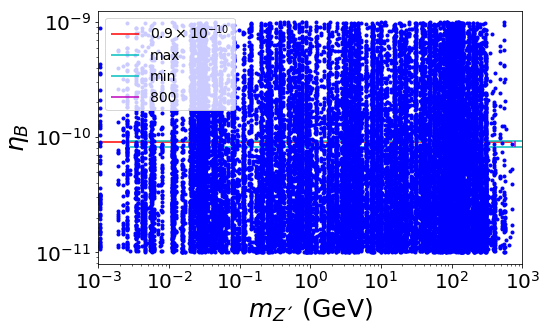

In [18]:
plt.figure(figsize=(8,5))

plt.loglog(gp.MZp,gp.etaB,'b.',label=r'')
plt.hlines(0.9e-10,gp.MZp.min(),gp.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')

#Experimental range
plt.hlines(eta_max,xd.mot.min(),xd.mot.max(),'c',label=r'max')
plt.hlines(eta_min,xd.mot.min(),xd.mot.max(),'c',label=r'min')
plt.vlines(800,eta_min,eta_max,'m',label=r'800')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':14},loc='best')

plt.xlim(1e-3,1e3)

plt.tight_layout()
plt.show()

Experimental range

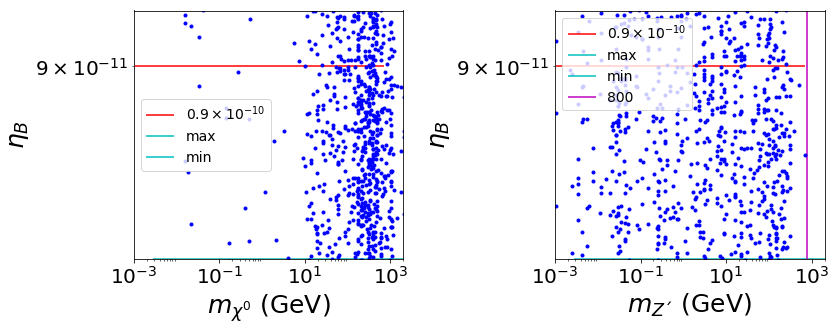

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(gp.mot,gp.etaB,'b.',label=r'')
plt.hlines(0.9e-10,gp.MZp.min(),gp.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')

#Experimental range
plt.hlines(eta_max,xd.mot.min(),xd.mot.max(),'c',label=r'max')
plt.hlines(eta_min,xd.mot.min(),xd.mot.max(),'c',label=r'min')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':14},loc='best')

plt.ylim(eta_min,eta_max)
plt.xlim(1e-3,2e3)

plt.subplot(122)
plt.loglog(gp.MZp,gp.etaB,'b.',label=r'')
plt.hlines(0.9e-10,gp.MZp.min(),gp.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')

#Experimental range
plt.hlines(eta_max,xd.mot.min(),xd.mot.max(),'c',label=r'max')
plt.hlines(eta_min,xd.mot.min(),xd.mot.max(),'c',label=r'min')
plt.vlines(800,eta_min,eta_max,'m',label=r'800')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':14},loc='best')

plt.ylim(eta_min,eta_max)
plt.xlim(1e-3,2e3)

plt.tight_layout()
plt.show()

Finals points in the experimental range

In [21]:
zd=xd[np.logical_and(xd.etaB > eta_min , xd.etaB < eta_max)]

zd = zd.reset_index()
del[zd['index']]

#export
#zd.to_csv('../DarkBariogenesis/etaB.csv')

In [22]:
zd.shape

(653, 11)

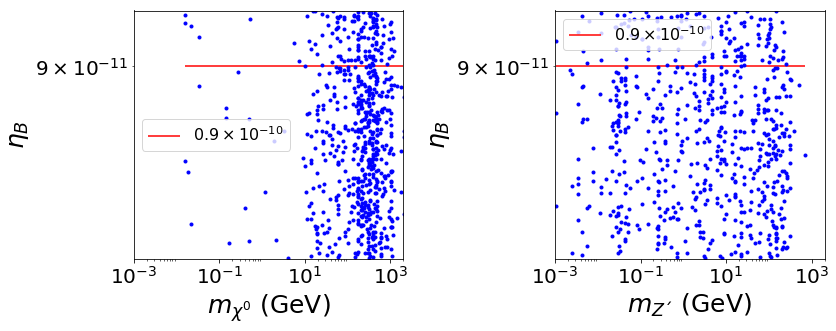

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.loglog(zd.mot, zd.etaB,'b.',label=r'')

plt.hlines(0.9e-10,zd.mot.min(),zd.mot.max(),'r',label=r'$0.9 \times 10^{-10}$')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.ylim(eta_min,eta_max)
plt.xlim(1e-3,2e3)

plt.subplot(122)
plt.loglog(zd.MZp, zd.etaB,'b.',label=r'')

plt.hlines(0.9e-10,zd.MZp.min(),zd.MZp.max(),'r',label=r'$0.9 \times 10^{-10}$')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.ylim(eta_min,eta_max)
plt.xlim(1e-3,2e3)

plt.tight_layout()
plt.show()

### Filtering data

yd is the Dataframe with all the good points (relic density and neutrinos). zd are the points with good nB. We will export a file with the points with at nB = 0 to run again in the cluster.

In [24]:
zd.shape

(653, 11)

In [61]:
NUM=yd.MZp[2]
NUM2=zd.MZp[2]

print(NUM, eval(format(NUM,'.8f')),NUM2, eval(format(NUM2,'.8f')))

726.393759 726.393759 0.280116403 0.2801164


In [68]:
# It takes the good etaB value at the moment, otherwise it put etaB=0
xx=[]

for j in range(0,yd.shape[0]):#good DataFrame
    
    MZp = yd.MZp[j] #element of the big dataframe

    for i in range(0,zd.shape[0]):#run zd with good nB

        if eval(format(MZp,'.6f')) == eval(format(zd.MZp[i],'.6f')):
            #print("found",i)

            etaB = zd.etaB[i]
            lamt = zd.lamt[i]
            tht = zd.tht[i]

            break

        else:
            etaB = 0.
            lamt = 0.
            tht = 0.

    xx.append([etaB,lamt,tht])

xx=np.asarray(xx)

xetaB=pd.DataFrame(xx,columns=['etaB','lamt','tht'])  

In [69]:
print(yd.shape,gp.shape,zd.shape,xetaB.shape)

(1350, 108) (27336, 11) (653, 11) (1350, 3)


In [84]:
#add to the Dataframe
yd['etaB'] = xetaB['etaB']
yd['lamt'] = xetaB['lamt']
yd['tht'] = xetaB['tht']

kk = yd[np.logical_and(yd.etaB == 0, yd.MZp < 1.3e+3)]
#export points to run again
kk = kk.reset_index()
del[kk['index']]
#kk.to_csv('good-points.csv')

kkk = yd[yd.etaB != 0.]#good etaB
kkk = kkk.reset_index()
del[kkk['index']]
kkk.to_csv('../DarkBariogenesis/etaB.csv')

print(kk.shape, kkk.shape)

(895, 108) (266, 108)


kkk has lest data because there are some repeated DM masses

## Analysis for YA2 vs lamt

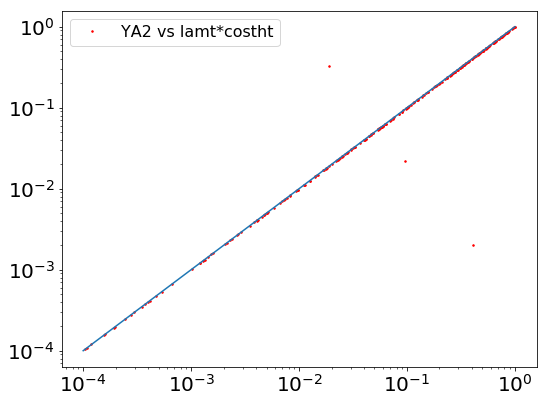

In [73]:
plt.figure(figsize=(8,6))

b = np.linspace(1e-4,1,10)

plt.loglog(kkk.YA2, kkk['lamt']*np.cos(kkk.tht), color='red', marker='.',ms=3,linestyle='',label='YA2 vs lamt*costht')
plt.plot(b,b)

plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
plt.show()

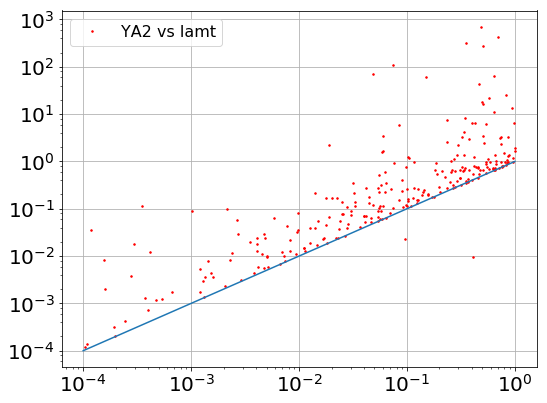

In [75]:
plt.figure(figsize=(8,6))

b = np.linspace(1e-4,1,10)

plt.loglog(kkk.YA2, kkk['lamt'], color='red', marker='.',ms=3,linestyle='',label='YA2 vs lamt')
plt.plot(b,b)

plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

In [83]:
kkk = yd[np.logical_and(yd.etaB != 0.,yd.lamt < 4*np.pi)]#good etaB
kkk = kkk.reset_index()
del[kkk['index']]
kkk.to_csv('../DarkBariogenesis/etaB.csv')

print( kkk.shape)

(252, 108)


## Randon parameters searching

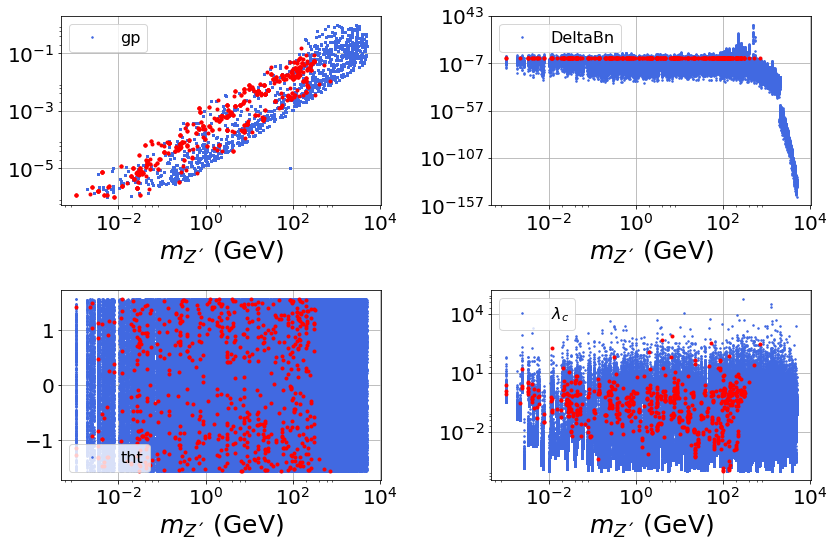

In [41]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.MZp, xd['gp'], color='royalblue', marker='.',ms=3,linestyle='',label='gp')
plt.loglog(zd.MZp, zd['gp'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.MZp, xd['Deltan_B'], color='royalblue', marker='.',ms=3,linestyle='',label='DeltaBn')
plt.loglog(zd.MZp, zd['Deltan_B'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.semilogx(xd.MZp, xd['tht'], color='royalblue', marker='.',ms=3,linestyle='',label='tht')
plt.semilogx(zd.MZp, zd['tht'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.MZp, xd.lamt, color='royalblue', marker='.',ms=3,linestyle='',label=r'$\lambda_c$')
plt.loglog(zd.MZp, zd['lamt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

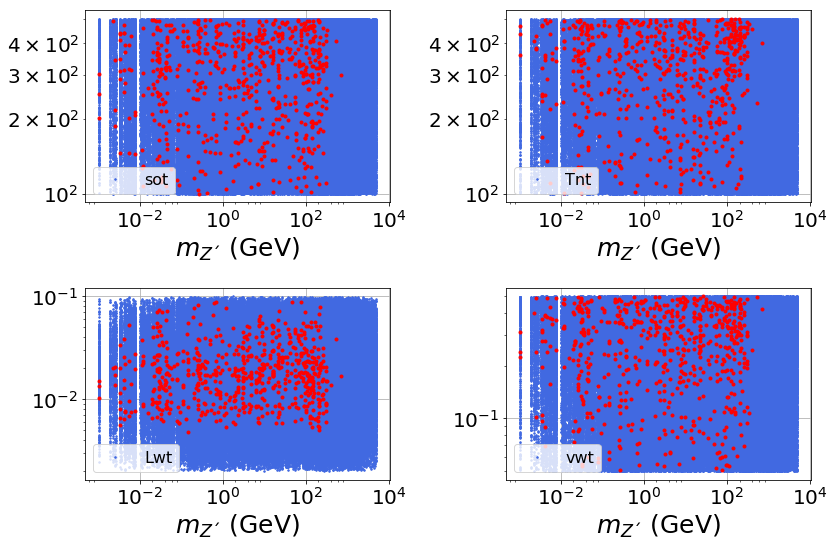

In [42]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.MZp, xd['sot'], color='royalblue', marker='.',ms=3,linestyle='',label='sot')
plt.loglog(zd.MZp, zd['sot'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.MZp, xd['Tnt'], color='royalblue', marker='.',ms=3,linestyle='',label='Tnt')
plt.loglog(zd.MZp, zd['Tnt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(xd.MZp, xd['Lwt'], color='royalblue', marker='.',ms=3,linestyle='',label='Lwt')
plt.loglog(zd.MZp, zd['Lwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.MZp, xd['vwt'], color='royalblue', marker='.',ms=3,linestyle='',label='vwt')
plt.loglog(zd.MZp, zd['vwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{Z´}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

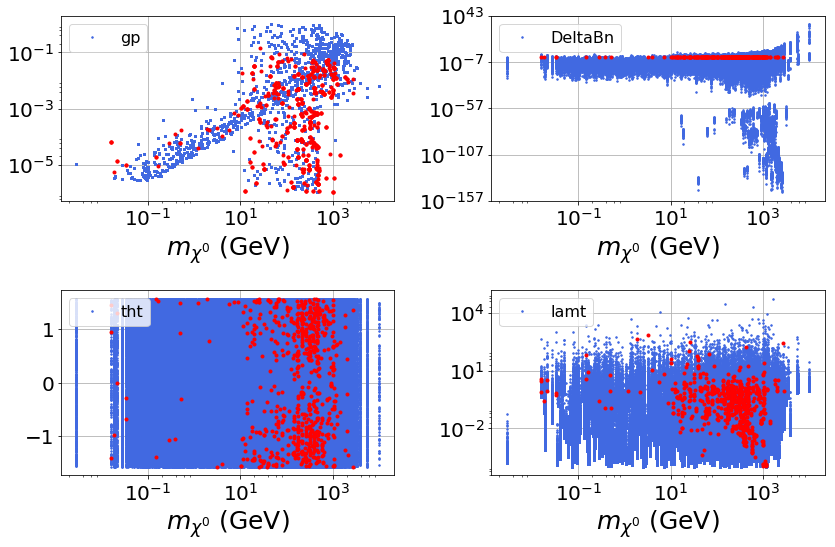

In [43]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mot, xd['gp'], color='royalblue', marker='.',ms=3,linestyle='',label='gp')
plt.loglog(zd.mot, zd['gp'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mot, xd['Deltan_B'], color='royalblue', marker='.',ms=3,linestyle='',label='DeltaBn')
plt.loglog(zd.mot, zd['Deltan_B'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.semilogx(xd.mot, xd['tht'], color='royalblue', marker='.',ms=3,linestyle='',label='tht')
plt.semilogx(zd.mot, zd['tht'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.mot, xd['lamt'], color='royalblue', marker='.',ms=3,linestyle='',label='lamt')
plt.loglog(zd.mot, zd['lamt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mot, xd['sot'], color='royalblue', marker='.',ms=3,linestyle='',label='sot')
plt.loglog(zd.mot, zd['sot'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mot, xd['Tnt'], color='royalblue', marker='.',ms=3,linestyle='',label='Tnt')
plt.loglog(zd.mot, zd['Tnt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(xd.mot, xd['Lwt'], color='royalblue', marker='.',ms=3,linestyle='',label='Lwt')
plt.loglog(zd.mot, zd['Lwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(xd.mot, xd['vwt'], color='royalblue', marker='.',ms=3,linestyle='',label='vwt')
plt.loglog(zd.mot, zd['vwt'], color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.semilogy( zd['sot'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='sot')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.semilogy(zd['Tnt'],zd.etaB,  color='red', marker='.',ms=3,linestyle='',label='Tnt')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog( zd['Lwt'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='Lwt')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog( zd['vwt'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='vwt')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(zd['gp'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='gp')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(zd['Deltan_B'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='DeltaBn')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.plot(zd['tht'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='tht')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(zd['lamt'],zd.etaB, color='red', marker='.',ms=3,linestyle='',label='lamt')

plt.ylabel(r'$\eta_B$',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()


plt.tight_layout()
plt.show()